In [3]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def read_list(filepath):

    res = []

    with open(filepath, 'r') as fp:
        lines = fp.readlines()
        for line in lines:
            res.append(float(line))

    return res

In [3]:
sfols = read_list('SFOLS.txt')
LOF = read_list('LOF.txt')
LOF1 = read_list('LOF1.txt')

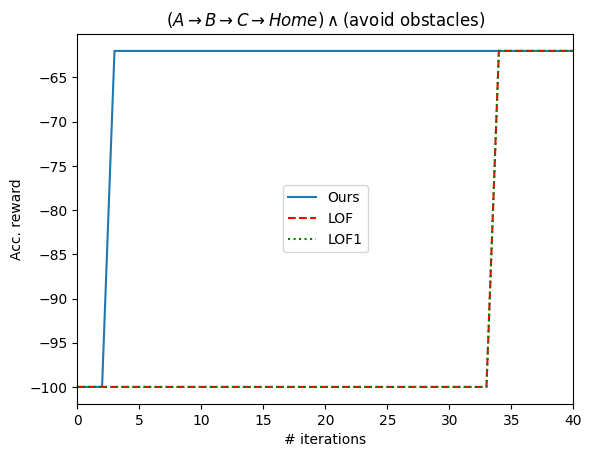

In [18]:
plt.plot(sfols)
plt.plot(LOF, linestyle="dashed", color="red")
plt.plot(LOF1, linestyle="dotted", color="green")

plt.legend(['Ours', 'LOF', 'LOF1'])
plt.title(r'$(A\rightarrow B\rightarrow C\rightarrow Home) \wedge$(avoid obstacles)')
plt.xlabel('# iterations')
plt.ylabel('Acc. reward')
plt.xlim((0,40))
plt.show()

In [20]:
sfols2 = read_list('SFOLS-2.txt')
LOF2 = read_list('LOF-2.txt')

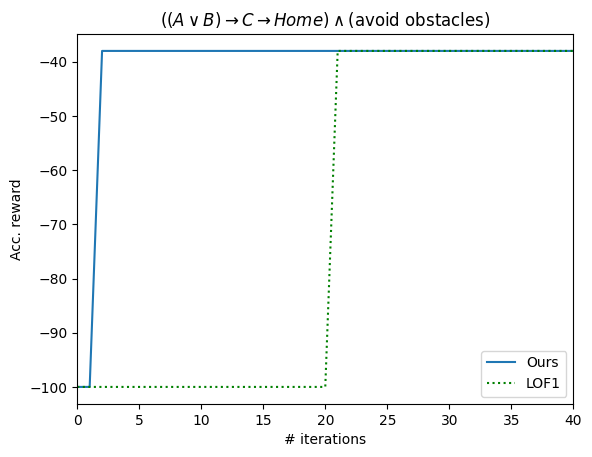

In [23]:
plt.plot(sfols2)
plt.plot(LOF2, linestyle="dotted", color="green")

plt.legend(['Ours', 'LOF1'])
plt.title(r'$((A\vee B)\rightarrow C\rightarrow Home) \wedge$(avoid obstacles)')
plt.xlabel('# iterations')
plt.ylabel('Acc. reward')
plt.xlim((0,40))
plt.show()

## Runtime


In [78]:
import pandas as pd

dfvi = pd.read_csv('wandb_sfvi.csv', index_col="metrics/evaluation/iter")
dflof = pd.read_csv('wandb_lof.csv', index_col="metrics/evaluation/iter")

In [79]:
# df ours
cols_to_drop = [col for col in dfvi.columns if "_step" in col]
dfvi.drop(labels=cols_to_drop, axis=1, inplace=True)
dfvi.rename({'Grouped runs - metrics/evaluation/time': '_mean', 
             'Grouped runs - metrics/evaluation/time__MIN': '_min',
             'Grouped runs - metrics/evaluation/time__MAX': '_max'}, axis="columns", inplace=True)

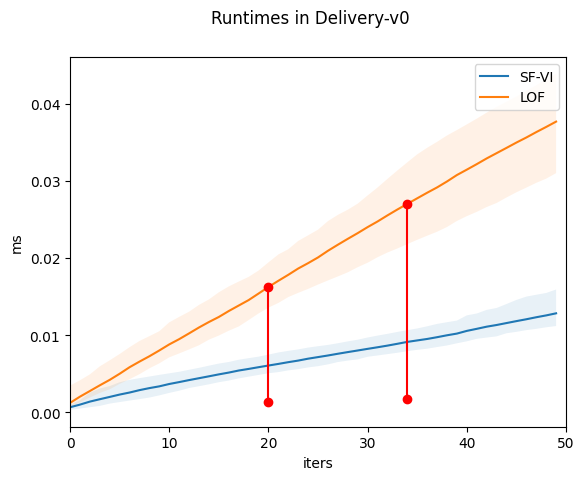

In [124]:
fig, ax = plt.subplots(1,1)
fig.suptitle("Runtimes in Delivery-v0")
ax.set_xlim((0,50))

cols_to_drop = [col for col in dflof.columns if "_step" in col]
dflof.drop(labels=cols_to_drop, axis=1, inplace=True)
dflof.rename({'Grouped runs - metrics/evaluation/time': '_mean', 
             'Grouped runs - metrics/evaluation/time__MIN': '_min',
             'Grouped runs - metrics/evaluation/time__MAX': '_max'}, axis="columns", inplace=True)

plt.plot(dfvi["_mean"], label="SF-VI")
plt.matplotlib.pyplot.fill_between(range(len(dfvi)), dfvi["_min"], dfvi["_max"], alpha=0.1)
ax.plot(dflof["_mean"], label="LOF")
ax.fill_between(range(len(dflof)), dflof["_min"], dflof["_max"], alpha=0.1)
ax.set_ylabel("ms")
ax.set_xlabel("iters")


ax.plot([20, 20], [dfvi["_mean"].iloc[2],  dflof["_mean"].iloc[20]], 'ro', linestyle="-")
ax.plot([34, 34], [dfvi["_mean"].iloc[3],  dflof["_mean"].iloc[34]], 'ro', linestyle="-")

ax.legend()
plt.show()

In [104]:
dfvi["_mean"].iloc[2],  dflof["_mean"].iloc[20]

(0.0013765229119194, 0.0162477890650431)

In [96]:
dfvi["_mean"].iloc[3, ]

0.0016846656799316

## DoubleSlit

In [38]:
lofdf = pd.read_csv("lof.csv")
sfolsdf = pd.read_csv("sfols.csv")

todrop = [col for col in lofdf.columns if "MIN" in col or "MAX" in col] + ["Step"]
lofdf = lofdf.drop(columns=todrop)

todrop = [col for col in sfolsdf.columns if "MIN" in col or "MAX" in col] + ["Step"]
sfolsdf = sfolsdf.drop(columns=todrop)


In [39]:
df1 = lofdf.to_numpy().flatten()
df2 = sfolsdf.to_numpy().flatten()
df1.mean(), df1.std(), df2.mean(), df2.std()

(-22.702, 5.72618511751061, -19.78, 3.6490546721034476)

# Delivery - Task 1

In [84]:
plt.ioff()

csfont = {'fontname':'AnjaliOldLipi', 'fontsize':30}
hfont = {'fontname':'AnjaliOldLipi', 'fontsize':30}

In [85]:
def columns_to_drop(df):
    todrop = []
    for col in df.columns:
        if '_step_' in col or '- _step' in col:
            todrop.append(col)
    return todrop


def cleandf(df):
    df = df.drop(columns=columns_to_drop(df))
    #rename 

    renames = {}

    for col in df.columns:
        
        if col == "global_step":
            renames.update({col : "step"})
        elif "__MAX" in col:
            renames.update({col : "MAX"})
        elif "__MIN" in col:
            renames.update({col : "MIN"})
        elif col.endswith("fsa_reward"):
            renames.update({col : "reward"})

    df = df.rename(columns=renames)
    
    return df

In [86]:
lofdf = pd.read_csv("LOF-delivery-task1.csv")
sfolsdf = pd.read_csv("SFOLS-delivery-task1.csv")
columns_to_drop(lofdf)

['env.gym_name: Delivery-v0 - _step',
 'env.gym_name: Delivery-v0 - _step__MIN',
 'env.gym_name: Delivery-v0 - _step__MAX']

In [87]:
df_lof = cleandf(lofdf)
df_sfols = cleandf(sfolsdf)
df_lof.columns

Index(['step', 'reward', 'MIN', 'MAX'], dtype='object')

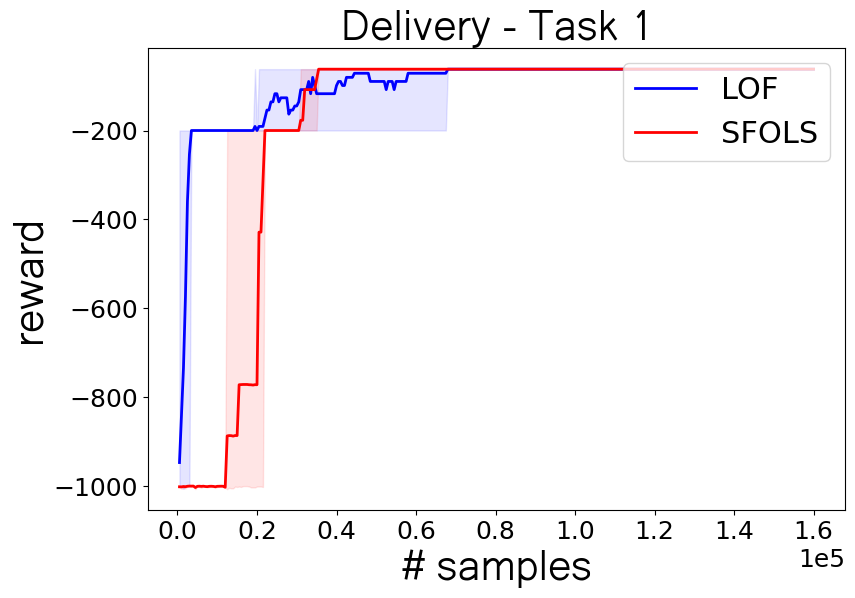

In [96]:
fig, ax = plt.subplots(1,1, figsize=(9, 6))
ax.set_title(fr'Delivery - Task 1', **csfont)

# VERSION 1
ax.plot(df_lof.step, df_lof.reward, linewidth=2, color='blue', label='LOF')
ax.fill_between(df_lof.step, df_lof.MIN, df_lof.MAX, color='blue', alpha=0.1)
# VERSION 2
ax.plot(df_sfols["learning/timestep"], df_sfols.reward, linewidth=2, color='red', label='SFOLS')
ax.fill_between(df_sfols["learning/timestep"], df_sfols.MIN, df_sfols.MAX, color='red', alpha=0.1)
# # VERSION 3
# ax.plot(v3_mean, linewidth=2,  color='limegreen', label='$V_3$')
# ax.fill_between(range(MAX_N_SAMPLES), v3_y1, v3_y2, color='limegreen', alpha=alpha)
# # VERSION FLAT
# ax.plot(flat_mean, linewidth=2, color='black', label='Z-IS')
# ax.fill_between(range(MAX_N_SAMPLES), flat_y1, flat_y2, color='black', alpha=alpha)

# # VERSION OPTIONS
# ax.plot(vo_mean, linewidth=2, color='orange', label='$Q_o$')
# ax.fill_between(range(len(vo_y1)), vo_y1, vo_y2, color='orange', alpha=alpha)

plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

legend = ['LOF', 'SFOLS']

ax.legend(fontsize=22, loc=1)
# ax.set_ylim((0, 1.01))
# ax.set_xscale("log")
# ax.set_xlim((1e1, 1e5))

ax.tick_params(axis='both', which='major', labelsize=18)
ax.tick_params(axis='both', which='minor', labelsize=18)
ax.xaxis.offsetText.set_fontsize(18)

ax.set_ylabel('reward', **hfont)
ax.set_xlabel('# samples', **hfont)

plt.show()